#### Imports

In [159]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Suppress warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### Business Questions to Find answers to

Question I want to provide answers to:
 - What are the most popular Airbnb destinations?
 - What factors influence cost of Airbnb rental costs?
 - What contributes to good Airbnb ratings?
 - Does cancelation policy affect reviews?

#### Data Understanding:

In [160]:
listings = pd.read_csv("seattle/listings.csv")
print("\nShape of dataset: ",listings.shape,"\n")
listings.head(3)


Shape of dataset:  (3818, 92) 



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [161]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [162]:
""" 
The output from this cell reveals there are a number of columns/rows 
that have nan/null values and hence require dropping(removing).
"""
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

#### Data Cleaning

The dataset has way so many features and not all of them are relevant for the analysis we want to do. This means we have to drop some columns(features) and rows however we'll need a good reason for each drop. 
I have listed categories of reasons and how to identify what to drop below:<br/>
<ol>
<li>Columns with non-unique values: These columns have a single repeated for all the rows of that columns and hence they do not add anything significant to the dataset.</li><br/>
<li>Rows that have about 70% of values as Nan, None or empty strings: 70% is a huge chunk of the dataset that we cannot impute data for and wouldn't make sense to maintain</li><br/>
</ol>

Having followed thr above process will reduce the features to 80 from 92.

In [163]:
# Calculate the threshold count for dropping columns
threshold_col = len(listings) * 0.7

# Replace empty and "none" values with NaN
listings_replaced = listings.replace(['', 'none'], np.nan)

# Count the number of NaN values in each column
na_counts = listings_replaced.isna().sum()

# Get the column indices where the count exceeds or equals the threshold
columns_to_drop_1 = na_counts[na_counts >= threshold_col].index

# Drop the columns
listings = listings_replaced.drop(columns=columns_to_drop_1)

# Get the unique value counts for each column
value_counts = listings.nunique()

# Get the column names where all values are the same
columns_to_drop_2 = value_counts[value_counts == 1].index

# Drop the non-unique columns of this dataset
listings = listings.drop(columns=columns_to_drop_2)
columns_to_drop = columns_to_drop_1.to_list() + columns_to_drop_2.to_list()
print("Dropped columns are :", columns_to_drop)
print("listings shape: ", listings.shape)
listings.head(3)

Dropped columns are : ['experiences_offered', 'square_feet', 'license', 'scrape_id', 'last_scraped', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names']
listings shape:  (3818, 80)


,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15


### Feature Selection:
The code below will print out all the columns of the dataset.
You can go through them manually to identify which features are most relevant to our analysis and which aren't.
This way we can drop more features and have a more meaningful dataset to work with.
<br/>

This could mean checking out each column to know what datatype type it is and if the value thereof is relevant. 
You'll find out that most of the Ids are not relevant for the analysis we want to make. Also some other columns like summary, description, space and other features where we are mostly dealing with texts/urls that can't be grouped into some sort of categorical variables need to be dropped as well because they are all unique for each and every role of that columns and hence doesn't pose anything interesting to study or analyse.

In [164]:
# Remove non-numeric characters from the 'pricing' column
listings['price'] = listings['price'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))

# Print the column names
print(listings.columns)

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'smart_location', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'gues

In [165]:
# Select the columns of interest, including 'price'

columns_of_interest = [
    'host_is_superhost',
    'neighbourhood_cleansed',
    'accommodates',
    'bedrooms',
    'bathrooms',
    'is_location_exact',
    'review_scores_rating',
    'property_type',
    'room_type',
    'beds',
    'bed_type',
    'number_of_reviews',
    'instant_bookable',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_communication',
    'review_scores_value',
    'cancellation_policy',
    'availability_365',
    'price'
]

len(columns_of_interest)

20

#### Heapmap showing correlation between selected non-categotical features

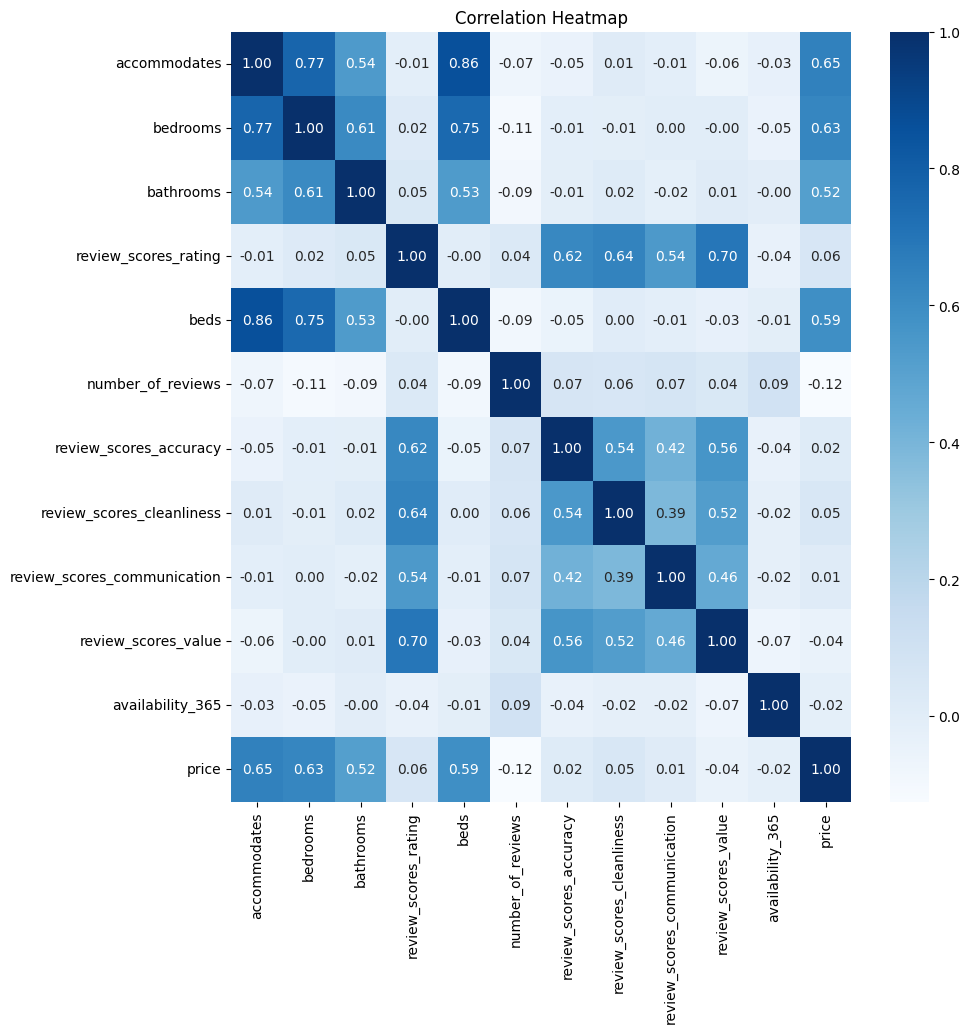

In [166]:
# Subset the data to include only the columns of interest
listings_relevant = listings.loc[:, columns_of_interest]

# Remove non-numeric characters from the 'pricing' column
listings_relevant['price'] = listings_relevant['price'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x))).astype(float)

# Calculate the correlation matrix
correlation_matrix = listings_relevant.corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Explanation to heatmaps:
Identify Highly Correlated Variables: Identify pairs or groups of variables with high positive or negative correlations. These variables may provide similar information or redundancy, which could impact the stability and interpretability of the regression model.

In this heatmap I identified a number of highly correlated exxplanatory varibales and these include: bedrooms and accommodates, beds and accommodates, review score ratings and all the other reviews.

Action plan: We may have to drop some of these column as they do bring some level of redundancy in the dataset. We can also do a second check with VIF to come to a conclusion and what these variables should be:

Out of the 20 features, only 12 were accounted for in the heapmap above because the remaining values are categorical and need to be treated differently.

<h5>To assess the impact of multicollinearity, you can examine the Variance Inflation Factor (VIF) values. A higher VIF value indicates a stronger correlation between an independent variable and the other independent variables in the model. There is no specific threshold or universally accepted benchmark for VIF valuesHere are some guidelines:

VIF < 5: Acceptable, indicates low multicollinearity.
VIF > 5: Moderate to high multicollinearity.
VIF > 10: High multicollinearity, concerning for model stability.
Consider context, goals, and domain knowledge.
Use additional diagnostics like correlation matrix and tolerance values.
No strict threshold, interpretation depends on the analysis.
Assess multicollinearity comprehensively for a better understanding. </h5>

In [167]:
# Assuming df is your DataFrame with the relevant variables
numeric_columns = listings_relevant.select_dtypes(include='number').dropna(axis=0)

# Select the independent variables for VIF calculation
X = numeric_columns.iloc[:,:-1]  # Replace with your variable names

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Predictors'] = X.columns
print(vif)

                       Variable         VIF                   Predictors
0                  accommodates   17.798858                 accommodates
1                      bedrooms    9.796619                     bedrooms
2                     bathrooms    8.850409                    bathrooms
3          review_scores_rating  586.528272         review_scores_rating
4                          beds   14.028878                         beds
5             number_of_reviews    1.494452            number_of_reviews
6        review_scores_accuracy  339.525067       review_scores_accuracy
7     review_scores_cleanliness  264.846084    review_scores_cleanliness
8   review_scores_communication  323.414983  review_scores_communication
9           review_scores_value  338.252996          review_scores_value
10             availability_365    5.140491             availability_365


In [168]:
# Identify columns with VIF > 10
high_vif_columns = vif[vif['VIF'] > 10]['Variable']

# Drop columns with VIF > 10 from the dataset
listings_relevant.drop(high_vif_columns, axis=1, inplace=True)

### Dealing with categorical variables & improperly represented Boolean Variables in the listings dataset:

This is still some part of the data cleaning process as we still do not have the dataset in the format it should be before completely anlysing. A few things:</br>
<ol>
<li>There are boolean values represent as strings in the form of 't' or 'f'. These should be replace with actual Boolean values of 0 and 1.</li>
<li>Idnetify the catogorical variables and treat them appropriately</li>
</ol>


In [169]:
# Identify columns containing 'f' or 't' values
boolean_cols = [col for col in listings_relevant if listings[col].isin(['f','t', np.nan]).all()]

# Convert 'f' to False and 't' to True in the identified columns
listings_relevant[boolean_cols] = listings_relevant[boolean_cols].replace({'f': False, 't': True})

#Remove all the nan values in the dataset and convert the True/False values to 0/1:
listings_relevant = listings_relevant.dropna(subset=[b for b in boolean_cols]).astype({b: int for b in boolean_cols})

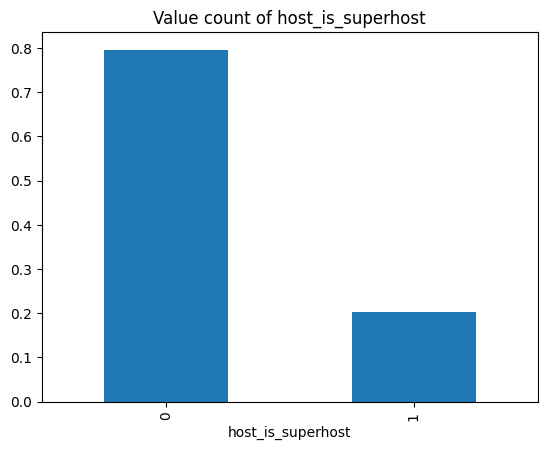

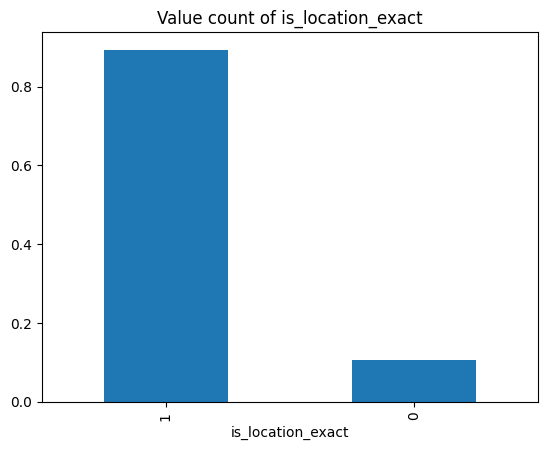

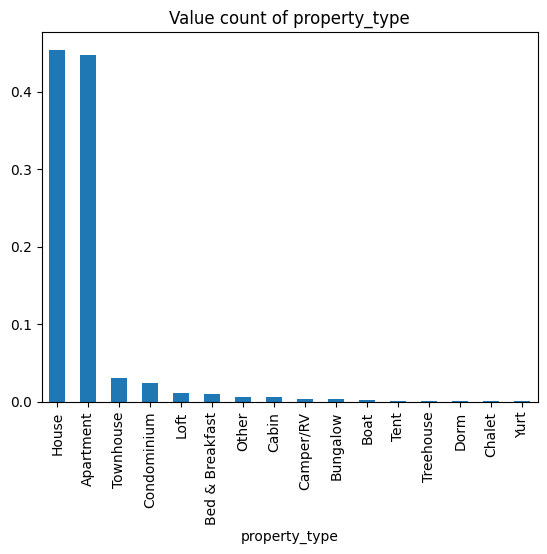

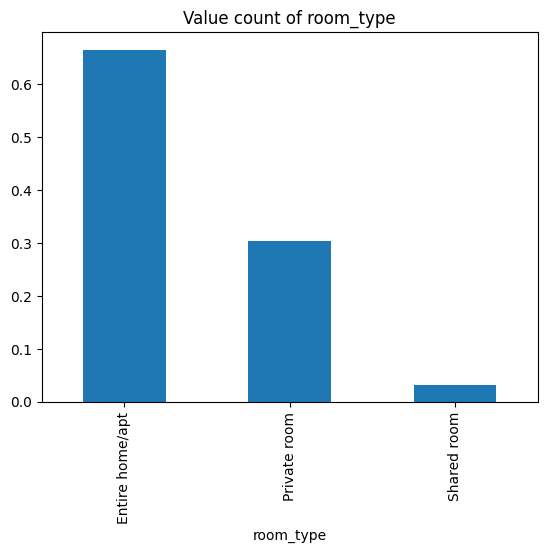

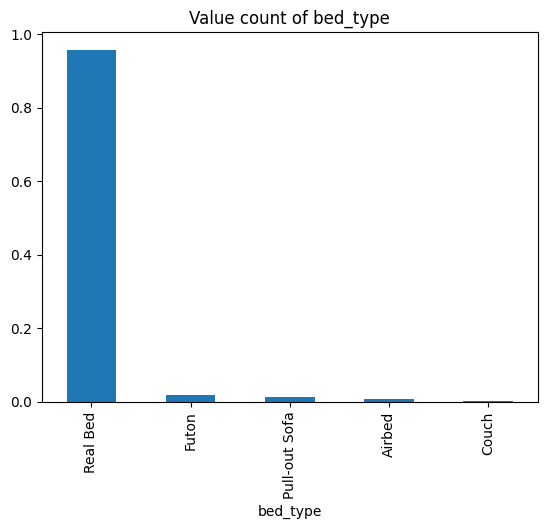

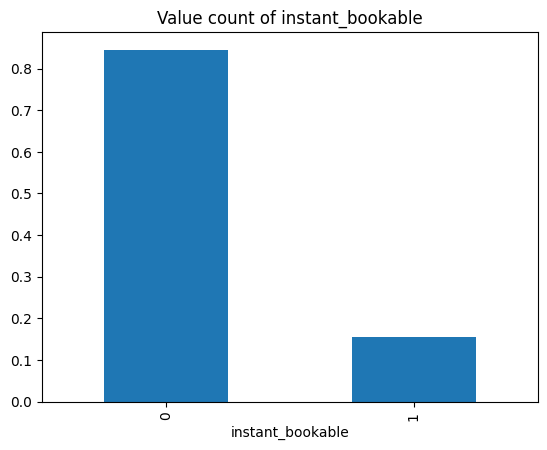

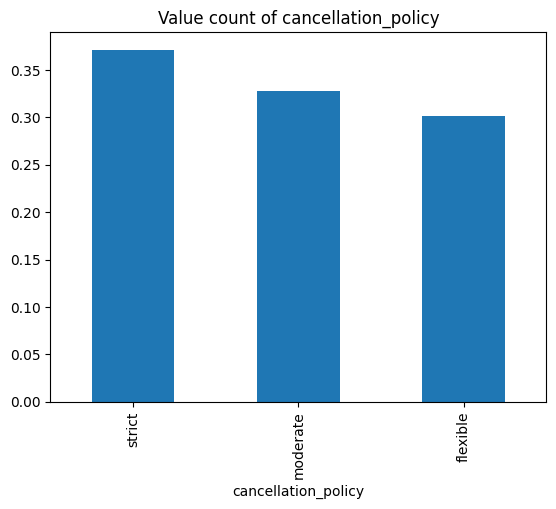

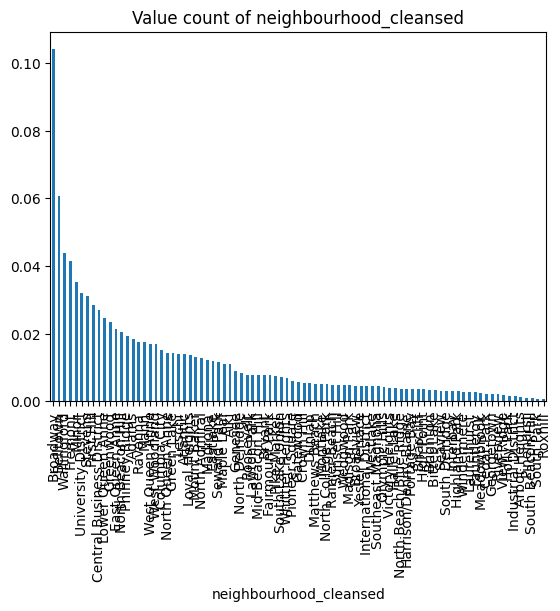

In [170]:
# Select the variables plot based on their count/frequency of occurences
variables_to_plot = ['host_is_superhost', 'is_location_exact', 'property_type',
                     'room_type', 'bed_type', 'instant_bookable', 
                     'cancellation_policy','neighbourhood_cleansed']

# Group by each column and plot against the price
for column in variables_to_plot:
    status_city = listings_relevant[column].value_counts()
    (status_city/listings_relevant.shape[0]).plot(kind="bar");
    plt.xlabel(column)
    plt.title(f'Value count of {column}')
    plt.show()

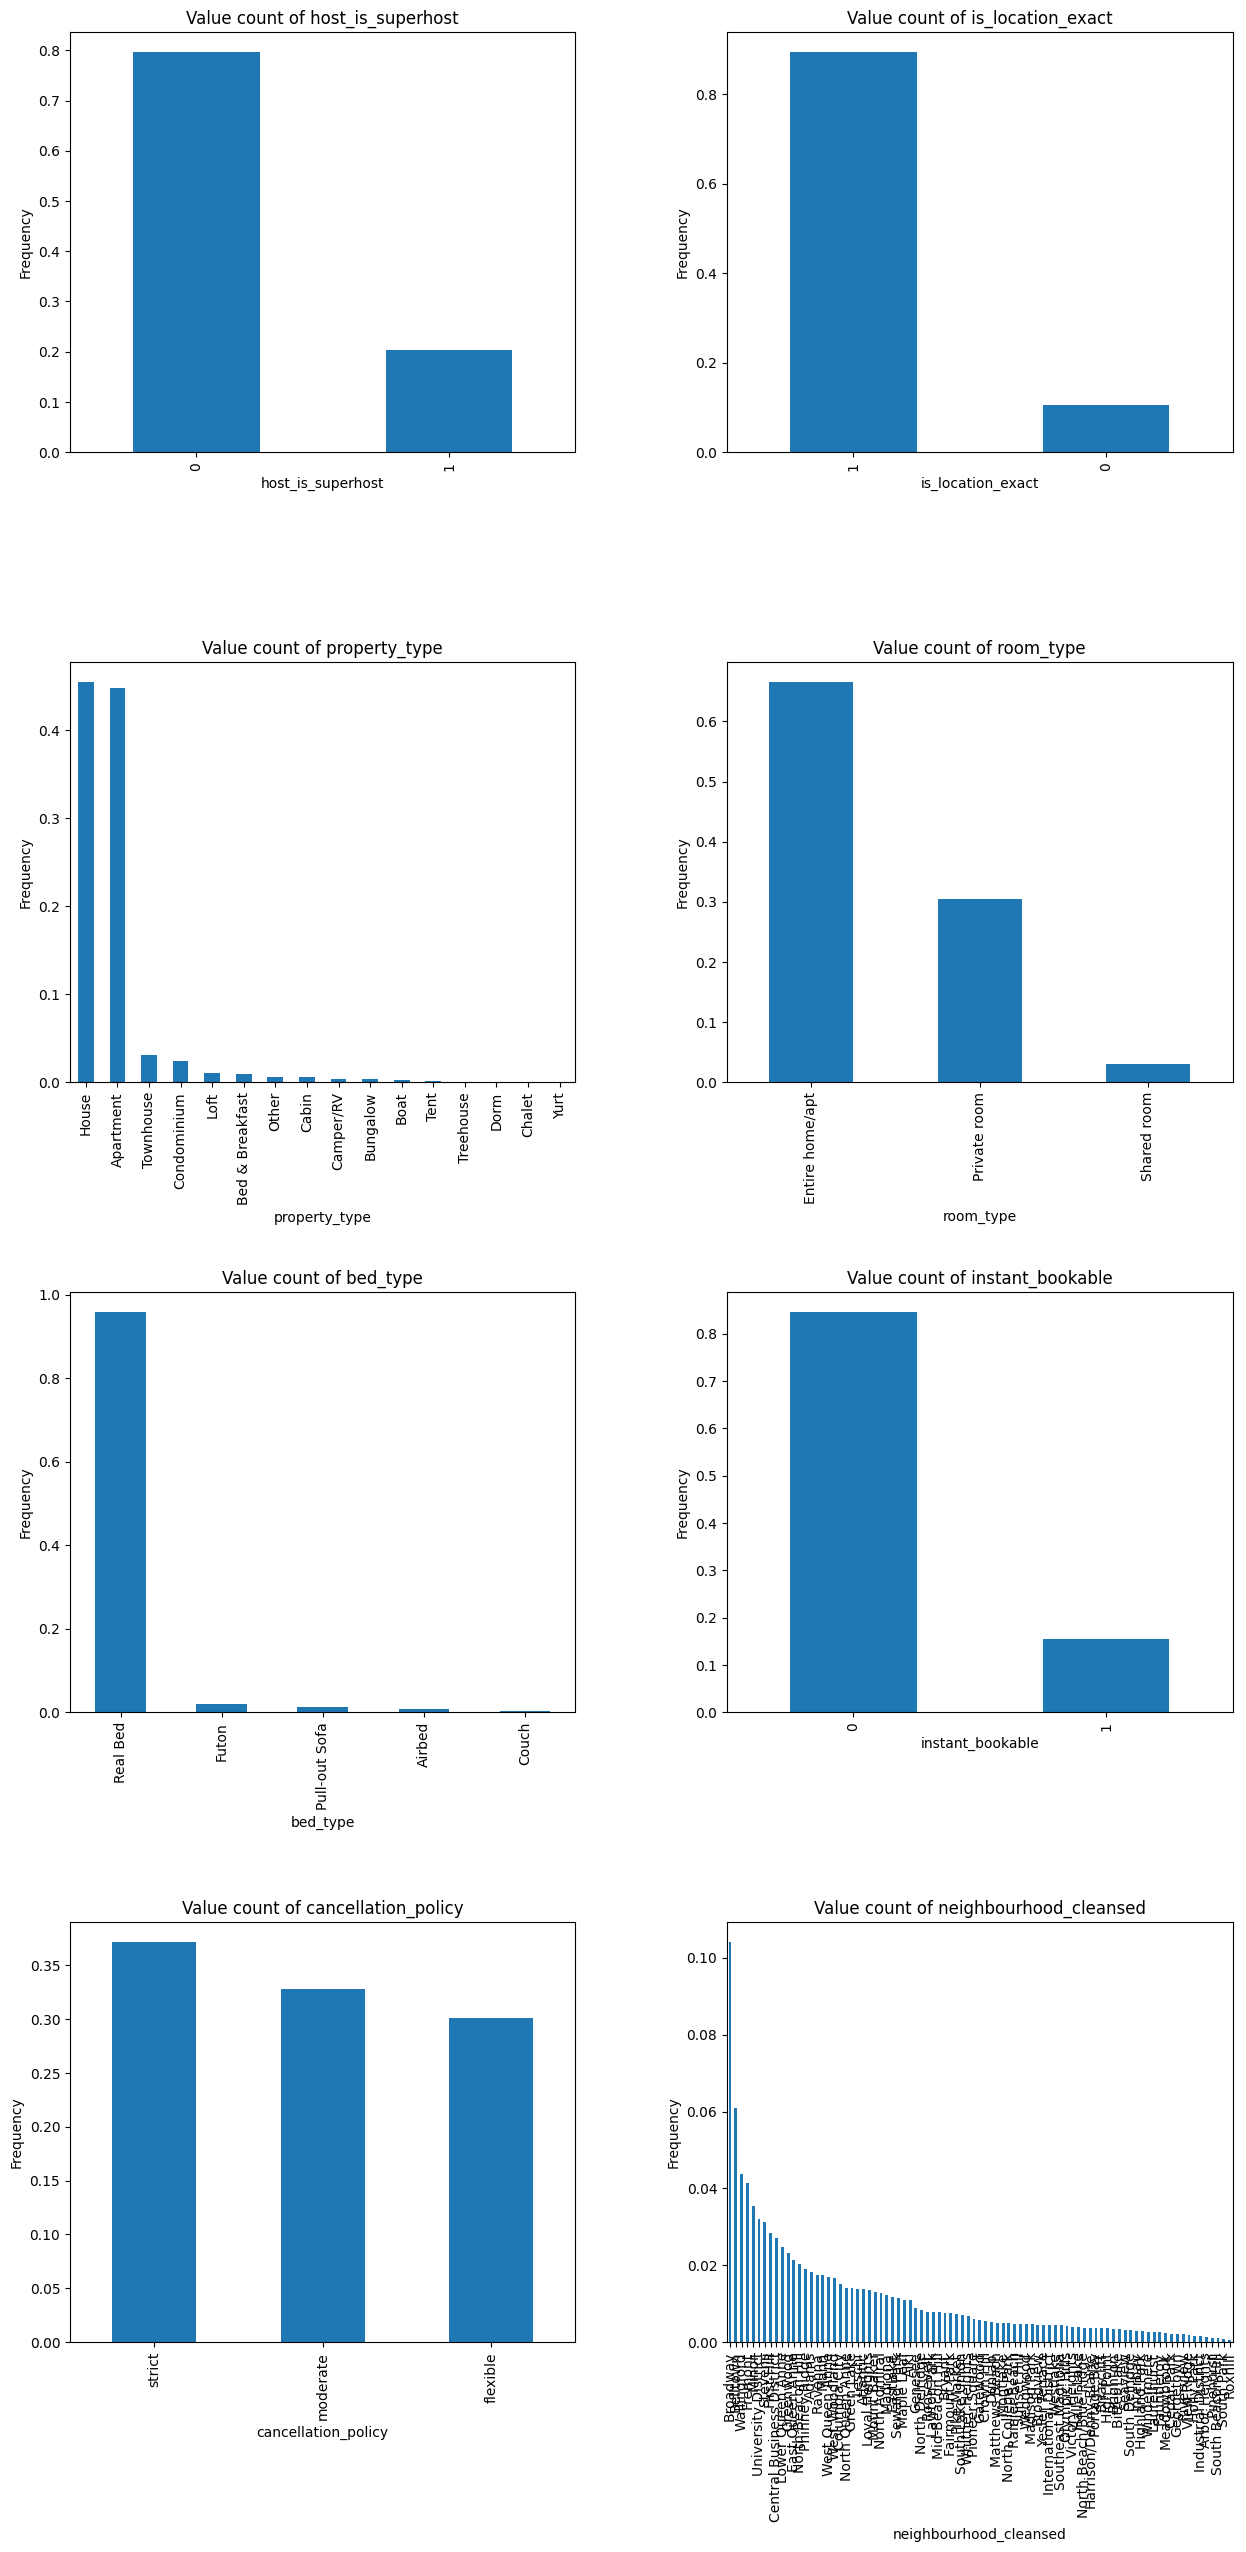

In [171]:
# Remove non-numeric characters from the 'price' column
listings_relevant['price'] = listings_relevant['price'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))

# Select the variables to normalize and plot against the price
variables_to_plot = ['host_is_superhost', 'is_location_exact', 'property_type',
                     'room_type', 'bed_type', 'instant_bookable',
                     'cancellation_policy', 'neighbourhood_cleansed']

# Calculate the number of rows and columns for the subplots
n_plots = len(variables_to_plot)
n_rows = math.ceil(n_plots / 2)
n_cols = 2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 30))

# Iterate over the variables and create the subplots
for i, column in enumerate(variables_to_plot):
    row = i // n_cols
    col = i % n_cols

    # Plot the value counts
    status_city = listings_relevant[column].value_counts()
    (status_city / listings_relevant.shape[0]).plot(kind="bar", ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Value count of {column}')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase the spacing between subplots

# Show the plots
plt.show()

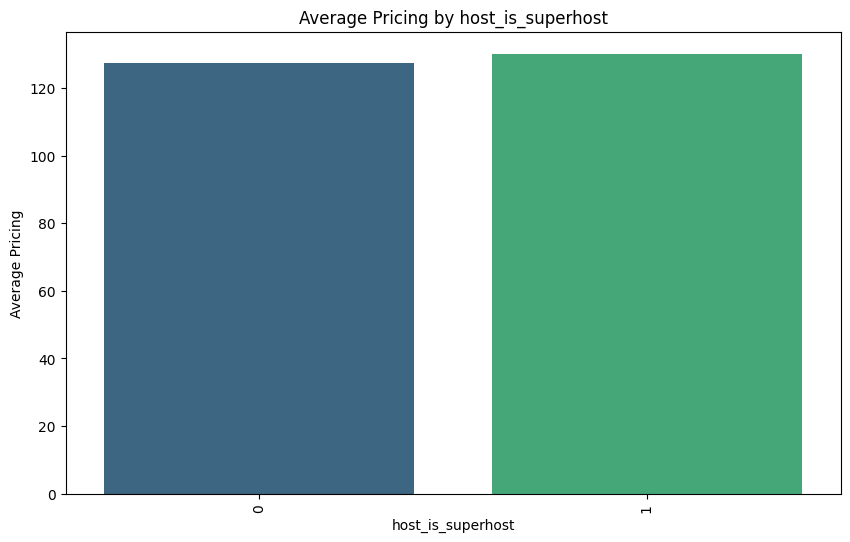

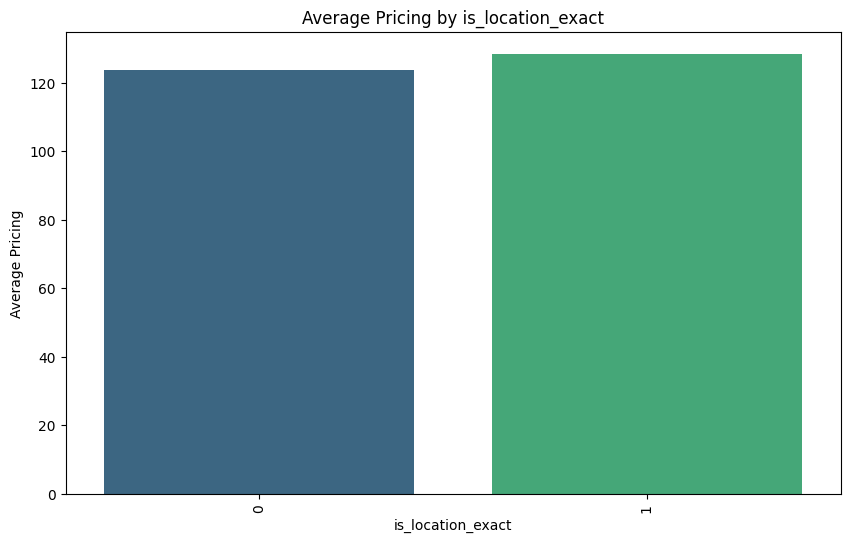

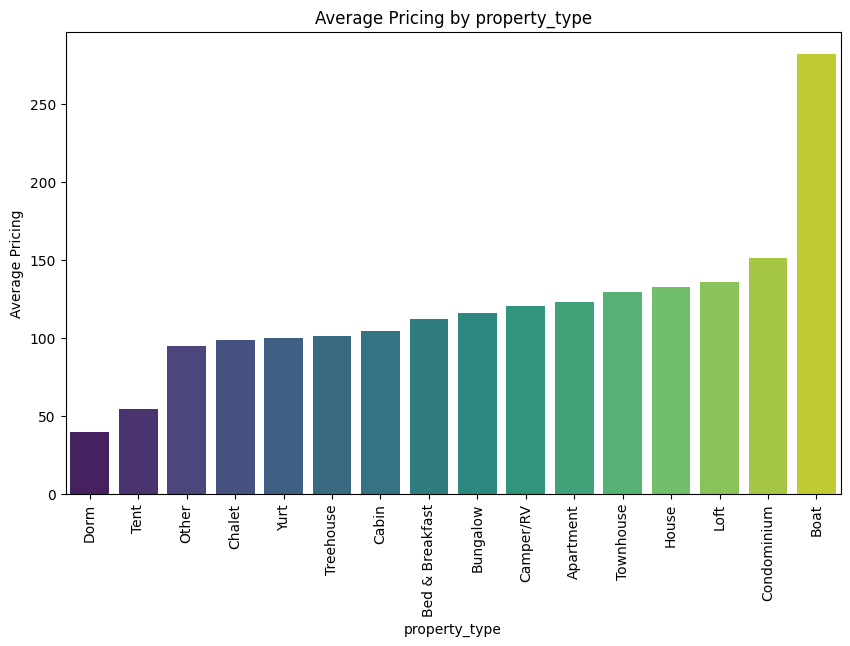

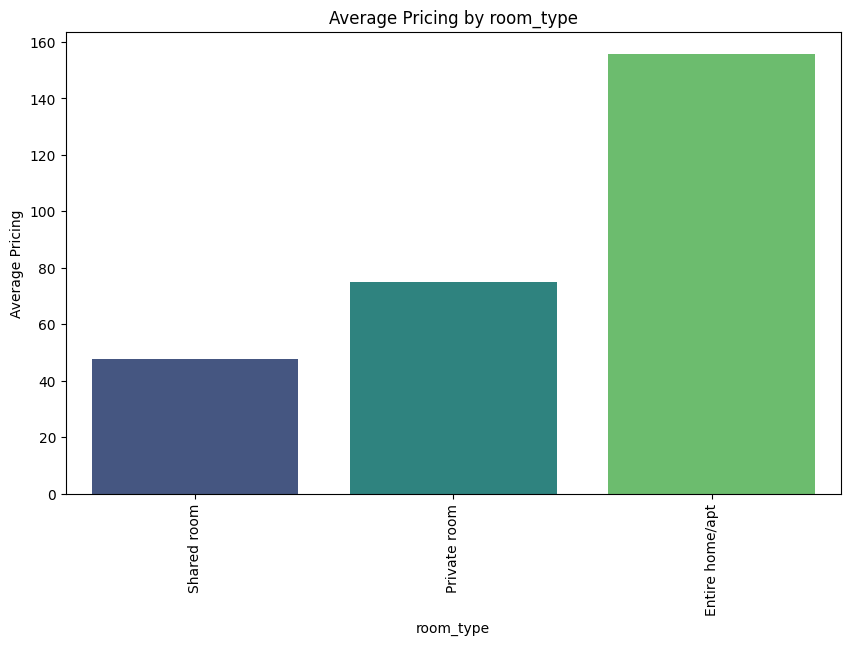

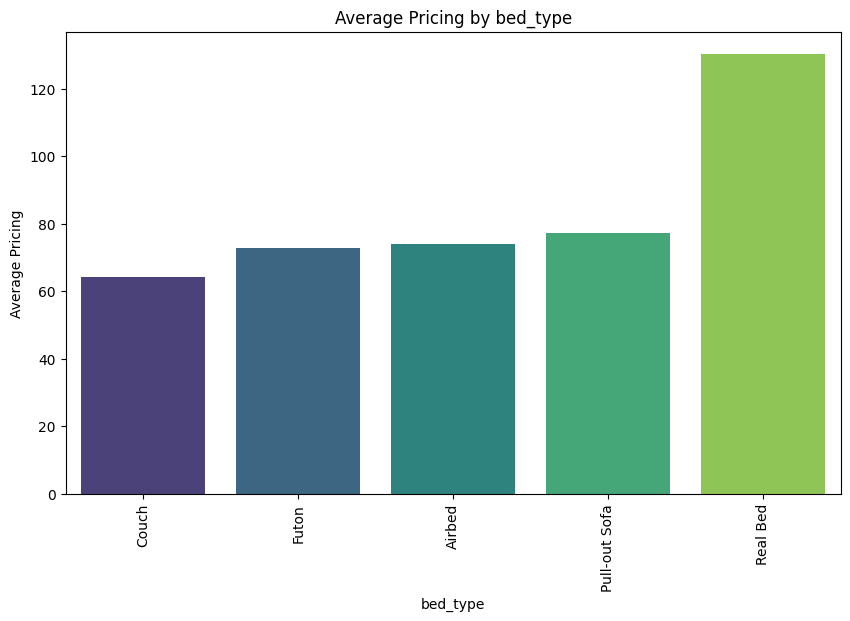

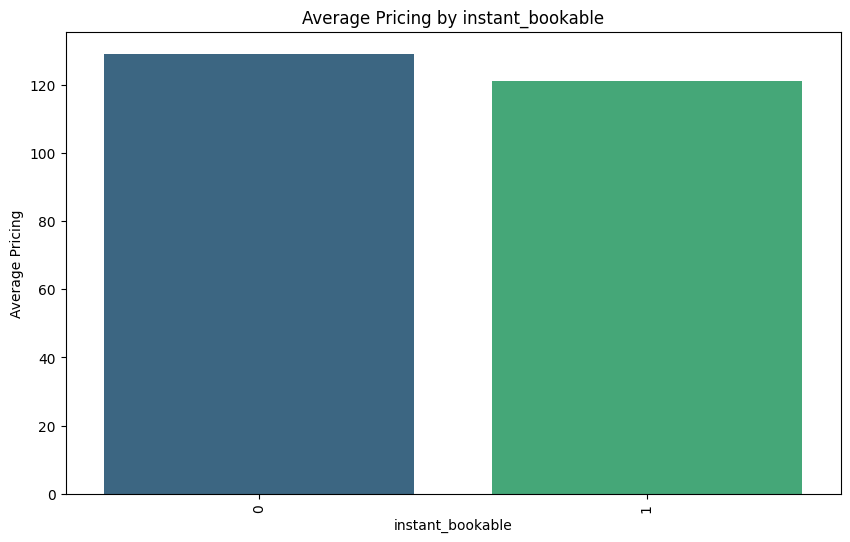

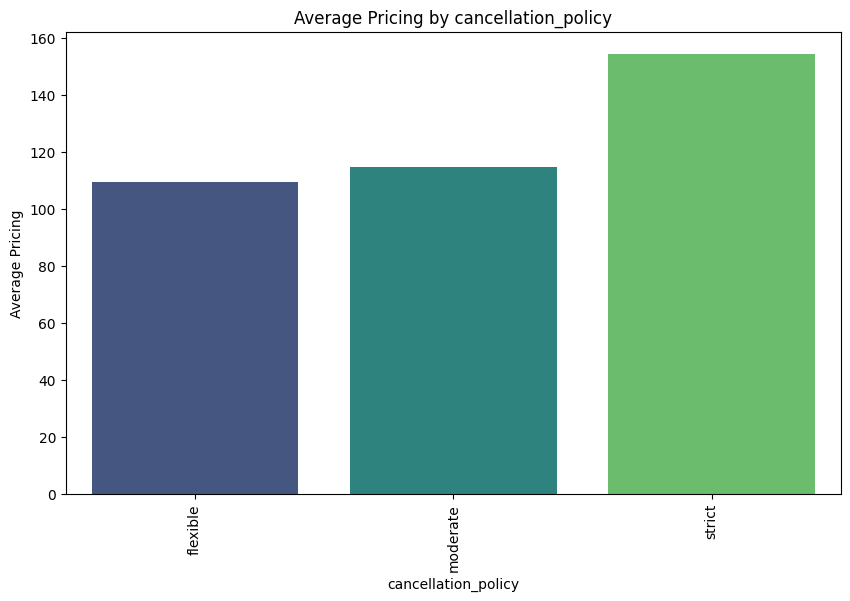

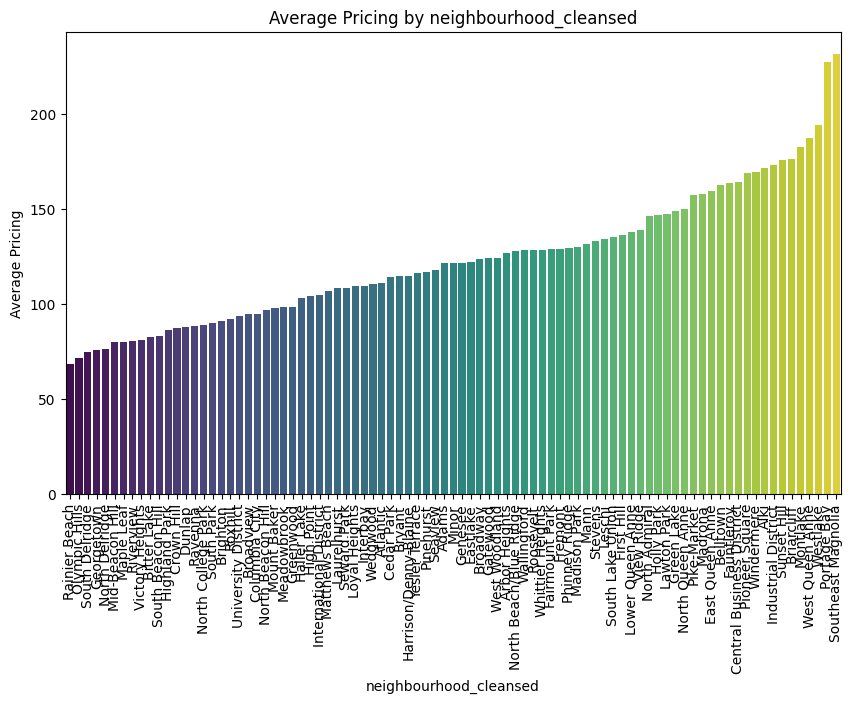

In [172]:
# Convert the 'price' column to float
listings_relevant['price'] = listings_relevant['price'].astype(float)

# Define the columns to group by
group_by_columns = ['host_is_superhost', 'is_location_exact', 'property_type',
                    'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy','neighbourhood_cleansed']

for col in group_by_columns:
    # Group the data by the specified columns and calculate the average pricing
    grouped_data = listings_relevant.groupby(col)['price'].mean().reset_index()

    # Sort the data in ascending order based on the 'price' column
    sorted_data = grouped_data.sort_values('price')

    # Plot the grouped data
    plt.figure(figsize=(10, 6))
    sns.barplot(data=sorted_data, x=col, y='price', palette='viridis')
    plt.xlabel(f'{col}')
    plt.ylabel('Average Pricing')
    plt.title(f'Average Pricing by {col}')

    # Get the x-axis tick labels
    x_ticks_labels = plt.gca().get_xticklabels()
    # Slant the x-axis tick labels by the specified angle
    plt.gca().set_xticklabels(x_ticks_labels, rotation=90)

    plt.show()



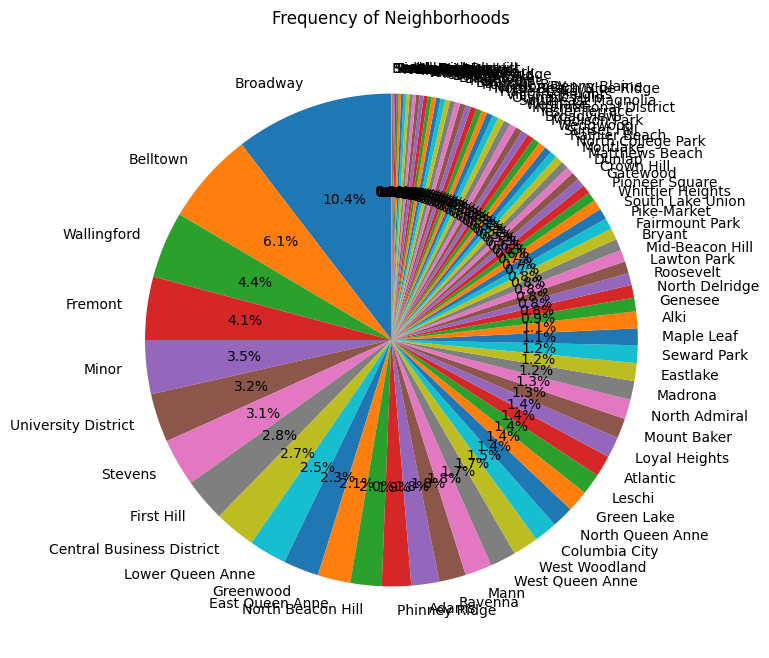

In [173]:
# Calculate the frequency of each neighborhood
neighborhood_counts = listings_relevant['neighbourhood_cleansed'].value_counts()

# Plot the frequency as a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Frequency of Neighborhoods')

# Show the pie chart
plt.show()

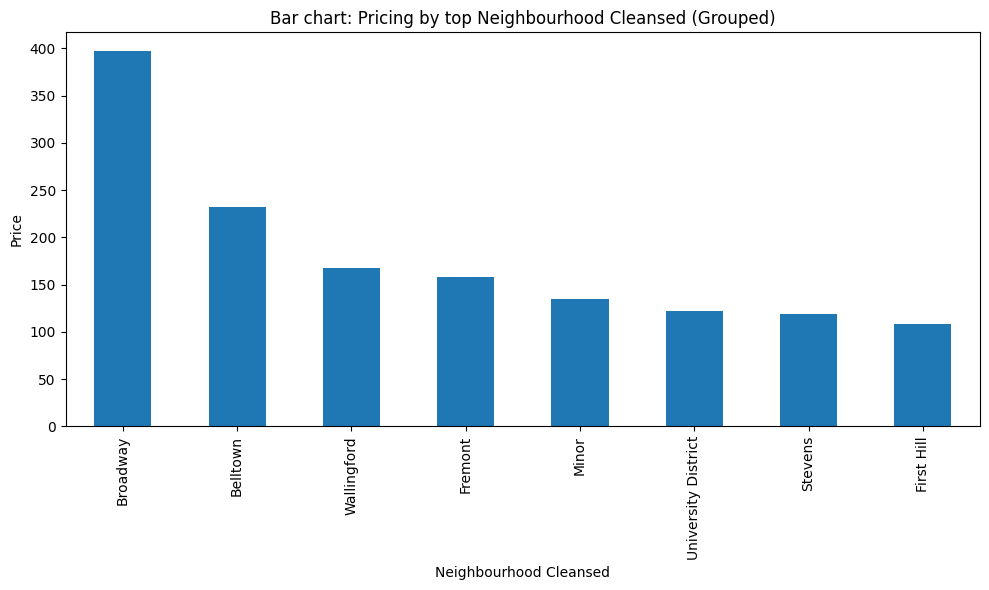

In [174]:
# Calculate the value counts of each neighborhood
neighborhood_counts = listings_relevant['neighbourhood_cleansed'].value_counts()

# Calculate the threshold for the top neighborhoods
threshold = int(len(neighborhood_counts) * 0.1)

# Get the top neighborhoods based on value counts
top_neighborhoods = neighborhood_counts.head(threshold)

# Filter the data for the top neighborhoods
filtered_data = listings_relevant[listings_relevant['neighbourhood_cleansed'].isin(top_neighborhoods.index)]

# Set the color palette for grouping
palette = sns.color_palette('viridis', len(filtered_data['neighbourhood_cleansed'].unique()))

# Create the cluster plot
plt.figure(figsize=(10, 6))
top_neighborhoods.plot(kind="bar")
# sns.stripplot(data=filtered_data, x='neighbourhood_cleansed', y='price', hue='neighbourhood_cleansed', palette=palette, dodge=True)
plt.xlabel('Neighbourhood Cleansed')
plt.ylabel('Price')
plt.title('Bar chart: Pricing by top Neighbourhood Cleansed (Grouped)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [175]:
print("\n".join([f"{column} : {listings_relevant[column].nunique()}" for column in listings_relevant.select_dtypes(exclude=['int']).columns]))

neighbourhood_cleansed : 87
bedrooms : 8
bathrooms : 12
property_type : 16
room_type : 3
bed_type : 5
cancellation_policy : 3
price : 273


In [176]:
listings_relevant = listings_relevant.dropna(axis=0)
listings_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3793 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       3793 non-null   int64  
 1   neighbourhood_cleansed  3793 non-null   object 
 2   bedrooms                3793 non-null   float64
 3   bathrooms               3793 non-null   float64
 4   is_location_exact       3793 non-null   int64  
 5   property_type           3793 non-null   object 
 6   room_type               3793 non-null   object 
 7   bed_type                3793 non-null   object 
 8   number_of_reviews       3793 non-null   int64  
 9   instant_bookable        3793 non-null   int64  
 10  cancellation_policy     3793 non-null   object 
 11  availability_365        3793 non-null   int64  
 12  price                   3793 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 414.9+ KB


The remaining columns in the calendar file do not have Nan values. However, there is common column names "date" in the calendar csv file and the reviews csv file. You may one to rename both as they do not represent the same kind of date.

In [177]:
# Create a new DataFrame for encoded data
encoded_data = listings_relevant.copy()

# Identify categorical variables based on data type
categorical_vars = listings_relevant.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding for categorical variables
encoded_data = pd.get_dummies(encoded_data, columns=categorical_vars, drop_first=True)

# Print the resulting encoded data
df = encoded_data
list(encoded_data.columns)

['host_is_superhost',
 'bedrooms',
 'bathrooms',
 'is_location_exact',
 'number_of_reviews',
 'instant_bookable',
 'availability_365',
 'price',
 'neighbourhood_cleansed_Alki',
 'neighbourhood_cleansed_Arbor Heights',
 'neighbourhood_cleansed_Atlantic',
 'neighbourhood_cleansed_Belltown',
 'neighbourhood_cleansed_Bitter Lake',
 'neighbourhood_cleansed_Briarcliff',
 'neighbourhood_cleansed_Brighton',
 'neighbourhood_cleansed_Broadview',
 'neighbourhood_cleansed_Broadway',
 'neighbourhood_cleansed_Bryant',
 'neighbourhood_cleansed_Cedar Park',
 'neighbourhood_cleansed_Central Business District',
 'neighbourhood_cleansed_Columbia City',
 'neighbourhood_cleansed_Crown Hill',
 'neighbourhood_cleansed_Dunlap',
 'neighbourhood_cleansed_East Queen Anne',
 'neighbourhood_cleansed_Eastlake',
 'neighbourhood_cleansed_Fairmount Park',
 'neighbourhood_cleansed_Fauntleroy',
 'neighbourhood_cleansed_First Hill',
 'neighbourhood_cleansed_Fremont',
 'neighbourhood_cleansed_Gatewood',
 'neighbourhood_cl

Summary Statistics:
       host_is_superhost     bedrooms    bathrooms  is_location_exact  \
count        3793.000000  3793.000000  3793.000000        3793.000000   
mean            0.205115     1.308463     1.260084           0.893488   
std             0.403839     0.884867     0.590934           0.308532   
min             0.000000     0.000000     0.000000           0.000000   
25%             0.000000     1.000000     1.000000           1.000000   
50%             0.000000     1.000000     1.000000           1.000000   
75%             0.000000     2.000000     1.000000           1.000000   
max             1.000000     7.000000     8.000000           1.000000   

       number_of_reviews  instant_bookable  availability_365        price  \
count        3793.000000       3793.000000       3793.000000  3793.000000   
mean           22.132876          0.154759        244.485895   128.018191   
std            37.569868          0.361722        126.853482    90.434794   
min           

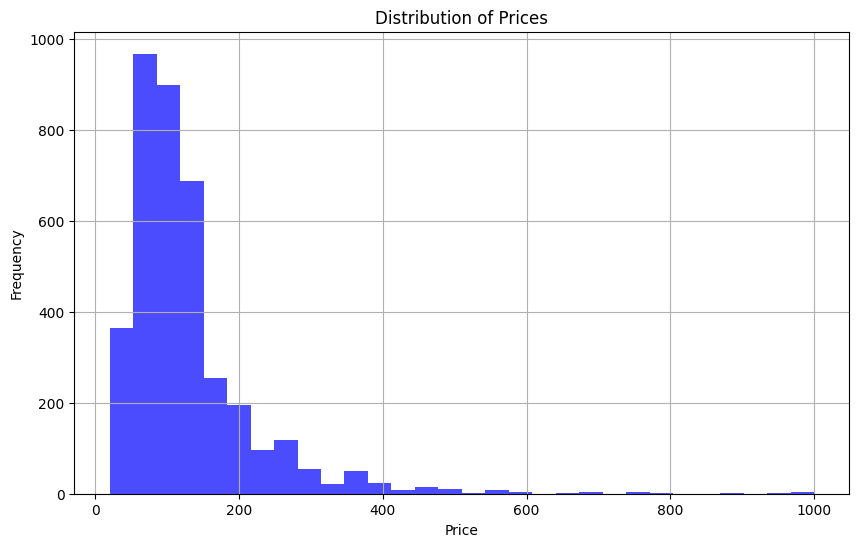

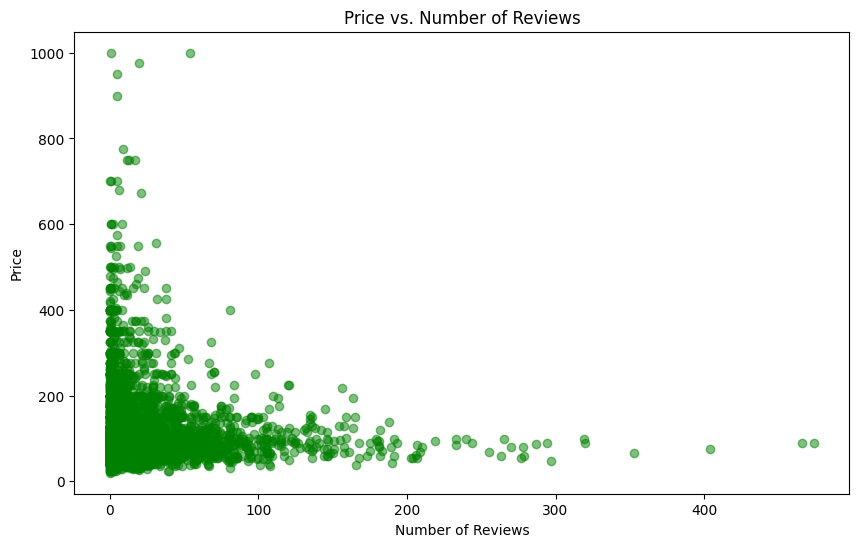

In [179]:
# Function to perform descriptive statistics and data visualization
def explore_data(dataset):
    """
    Perform descriptive statistics and data visualization for the Airbnb dataset.
    
    Args:
        dataset (pandas.DataFrame): The input dataset to explore.
    
    Returns:
        None
    """
    
    # Perform descriptive statistics
    summary_stats = dataset.describe()
    
    # Print the summary statistics
    print("Summary Statistics:")
    print(summary_stats)
    
    # Perform data visualization
    
    # Histogram of prices
    plt.figure(figsize=(10, 6))
    dataset['price'].hist(bins=30, color='blue', alpha=0.7)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title('Distribution of Prices')
    plt.show()
    
    # Scatter plot of price vs. number_of_reviews
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset['number_of_reviews'], dataset['price'], color='green', alpha=0.5)
    plt.xlabel('Number of Reviews')
    plt.ylabel('Price')
    plt.title('Price vs. Number of Reviews')
    plt.show()

# Call the explore_data function with the loaded dataset
explore_data(encoded_data)

### Modeling phase

In [158]:
y = df['price']
X = df.drop('price', axis=1)

# Assuming X_train, y_train, X_test, y_test are prepared training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant column to X for the intercept term in the regression model
X = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the regression results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.721
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                              69.20
Date:                Wed, 12 Jul 2023   Prob (F-statistic):                        0.00
Time:                        00:39:32   Log-Likelihood:                         -17736.
No. Observations:                3034   AIC:                                  3.569e+04
Df Residuals:                    2925   BIC:                                  3.635e+04
Df Model:                         109                                                  
Covariance Type:            nonrobust                                                  
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---

### Identify Additional multicollinearity in dataset after adding categorical variables:

In [155]:
# Select the independent variables for VIF calculation
X = df.drop('price', axis=1)  # Replace with your variable names

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Predictors'] = X.columns
# Identify columns with VIF > 10
high_vif_columns = vif[vif['VIF'] > 10]['Variable']

# Drop columns with VIF > 10 from the dataset
df.drop(high_vif_columns, axis=1, inplace=True)
df.head()

,host_is_superhost,number_of_reviews,instant_bookable,price,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,...,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,cancellation_policy_moderate,cancellation_policy_strict
0,0,207,0,85.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,43,0,150.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,20,0,975.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,38,0,450.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [156]:
# Add a constant column to X for the intercept term in the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     17.79
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          4.70e-261
Time:                        00:37:03   Log-Likelihood:                -21659.
No. Observations:                3793   AIC:                         4.354e+04
Df Residuals:                    3682   BIC:                         4.423e+04
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------